<a href="https://colab.research.google.com/github/jugernaut/Numerico2021/blob/desarrollo/02_EcuacionesNoLineales/Biseccion_interactive.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

fatal: destination path 'Numerico2021' already exists and is not an empty directory.


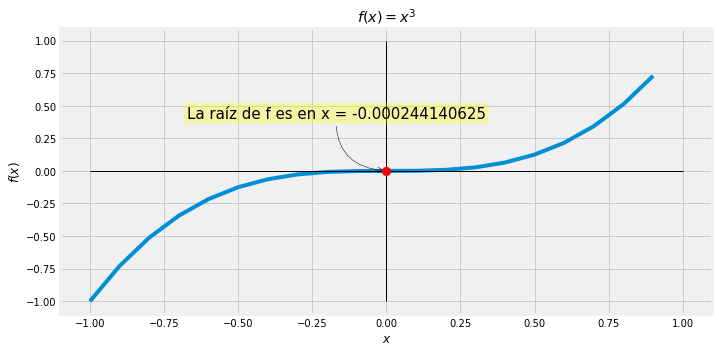

In [57]:
!git clone https://github.com/jugernaut/Numerico2021.git
import os
import numpy as np
import matplotlib.pyplot as plt
import Numerico2021.Utils.gutils as vis
%matplotlib inline

def f(x):
  return x**3

x4 = np.arange(-1, 1, 0.1)
y4 = [f(i) for i in x4]
raiz,sucesion = Biseccion(f,0.001,1000,-1,2)

par = [{'title':'$f(x) = x^3$', 
        'xlabel':'$x$',
        'ylabel':'$f(x)$'}]
graf = vis.planoCartesiano(par=par)
#funcion a grficar
graf.plot(x=x4,y=y4)
#ejes
graf.plot(x = [-1, 1], y = [0, 0], par={'ls':'-', 'lw':1, 'color':'black'})
graf.plot(x = [0, 0], y = [-1, 1], par={'ls':'-', 'lw':1, 'color':'black'})

graf.scatter(x=[raiz],y=[0.],par={'c':'red','marker':'o','s':75, 'zorder':5})
graf.annotate(par={'s':'La raíz de f es en x = '+str(raiz), 'xy':(raiz, 0), 'xytext':(-50,50), 'fontsize':15,
            'textcoords':'offset points', 'ha':'center', 'va':'bottom',
            'bbox':{'boxstyle':'round','pad':0.2, 'fc':'yellow', 'alpha':0.3},
            'arrowprops':{'arrowstyle':'->', 'connectionstyle':'arc3,rad=0.5', 
                           'color':'black'}})

graf.show()

In [49]:
!rm -r Numerico2021